## Week 1 - Data Analysis and Visualization on Gapminder data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

## Continents

In [2]:
# 1. read the file into a DataFrame

continents = pd.read_csv('/home/lorena/Documents/bootcamp/W1/continents.csv', sep=';')
continents.head()

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [3]:
# 2. display the number of rows and columns

continents.shape

(194, 2)

In [4]:
# 3. display the first 5 countries in the alphabet

continents.country[:5]

0     Algeria
1      Angola
2       Benin
3    Botswana
4     Burkina
Name: country, dtype: object

In [5]:
continents.sort_values('country').head()

,continent,country
54,Asia,Afghanistan
98,Europe,Albania
0,Africa,Algeria
99,Europe,Andorra
1,Africa,Angola


In [6]:
continents.sort_values('country').iloc[:5]

,continent,country
54,Asia,Afghanistan
98,Europe,Albania
0,Africa,Algeria
99,Europe,Andorra
1,Africa,Angola


In [7]:
continents['country'].sort_values().head()

54    Afghanistan
98        Albania
0         Algeria
99        Andorra
1          Angola
Name: country, dtype: object

In [8]:
first_five = continents.sort_values('country', inplace=True)
first_five.head()

AttributeError: &#39;NoneType&#39; object has no attribute &#39;head&#39;

In [9]:
# 4. which continent has the most countries?

continents.groupby('continent')['country'].count()

continent
Africa                   54
Asia                     44
Australia and Oceania    14
Europe                   47
North America            23
South America            12
Name: country, dtype: int64

In [10]:
continents.groupby('continent').count().sort_values('country', ascending=False)

,country
continent,
Africa,54
Europe,47
Asia,44
North America,23
Australia and Oceania,14
South America,12


In [19]:
continents['continent'].value_counts.max().head(1)

AttributeError: &#39;function&#39; object has no attribute &#39;max&#39;

In [28]:
# 5. find out on which continent Cyprus is

continents.loc[continents['country'] == 'Cyprus']

,continent,country
108,Europe,Cyprus


In [21]:
continents.loc[continents['country'] == 'Cyprus', 'continent']

108    Europe
Name: continent, dtype: object

In [29]:
# 6. define a DataFrame with all African countries

africa = continents[continents['continent'] == 'Africa']
africa.head()

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [23]:
# 7. define a DataFrame with countries 80 through 100

subset = continents.iloc[80:101]
subset.head()

,continent,country
119,Europe,Ireland
67,Asia,Israel
120,Europe,Italy
23,Africa,Ivory Coast
159,North America,Jamaica


In [31]:
# 8. select every second country

continents['country'][::2]

0                       Algeria
2                         Benin
4                       Burkina
6                      Cameroon
8      Central African Republic
                 ...           
184                      Brazil
186                    Colombia
188                      Guyana
190                        Peru
192                     Uruguay
Name: country, Length: 97, dtype: object

In [24]:
continents[continents.index % 2 == 0]

,continent,country
54,Asia,Afghanistan
98,Europe,Albania
0,Africa,Algeria
182,South America,Argentina
100,Europe,Armenia
...,...,...
94,Asia,United Arab Emirates
192,South America,Uruguay
144,Europe,Vatican City
96,Asia,Vietnam


In [25]:
continents.iloc[::2]

,continent,country
54,Asia,Afghanistan
0,Africa,Algeria
1,Africa,Angola
182,South America,Argentina
168,Australia and Oceania,Australia
...,...,...
167,North America,United States
95,Asia,Uzbekistan
144,Europe,Vatican City
96,Asia,Vietnam


In [32]:
# 9. select 10 random countries

continents.country.sample(10)

170         Kiribati
63             India
49              Togo
35           Namibia
37           Nigeria
34        Mozambique
130      Netherlands
56        Bangladesh
128           Monaco
22     Guinea-Bissau
Name: country, dtype: object

In [28]:
continents.sample(10, random_state=42)

,continent,country
132,Europe,Poland
104,Europe,Belgium
87,Asia,Singapore
76,Asia,Lebanon
156,North America,Guatemala
41,Africa,Seychelles
16,Africa,Eritrea
103,Europe,Belarus
32,Africa,Mauritius
31,Africa,Mauritania


In [27]:
# 10. select all countries having two or more a`s

continents[continents['country'].str.contains('a')]

,continent,country
54,Asia,Afghanistan
98,Europe,Albania
0,Africa,Algeria
99,Europe,Andorra
1,Africa,Angola
...,...,...
144,Europe,Vatican City
193,South America,Venezuela
96,Asia,Vietnam
52,Africa,Zambia


In [30]:
# Select all countries that don't contain an 'a'

continents[~continents['country'].str.contains('a')]

,continent,country
104,Europe,Belgium
148,North America,Belize
2,Africa,Benin
58,Asia,Brunei
5,Africa,Burundi
185,South America,Chile
10,Africa,Comoros
11,Africa,Congo
108,Europe,Cyprus
109,Europe,Czech Republic


In [34]:
continents['acount'] = continents['country'].str.count('a')

54     2
98     2
0      1
99     1
1      1
      ..
193    1
96     1
97     0
52     2
53     1
Name: country, Length: 194, dtype: int64

In [35]:
# combine two dataframes

a = continents.sample(5, random_state=42)
b = continents.sample(5, random_state=42)

In [36]:
pd.concat([a,b])

,continent,country
132,Europe,Poland
104,Europe,Belgium
87,Asia,Singapore
76,Asia,Lebanon
156,North America,Guatemala
132,Europe,Poland
104,Europe,Belgium
87,Asia,Singapore
76,Asia,Lebanon
156,North America,Guatemala


In [37]:
pd.concat([a,b], axis=1)

,continent,country,continent,country
132,Europe,Poland,Europe,Poland
104,Europe,Belgium,Europe,Belgium
87,Asia,Singapore,Asia,Singapore
76,Asia,Lebanon,Asia,Lebanon
156,North America,Guatemala,North America,Guatemala


### Data visualization

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline  

&lt;AxesSubplot:title={&#39;center&#39;:&#39;Countries per Continent&#39;}, xlabel=&#39;continent&#39;&gt;

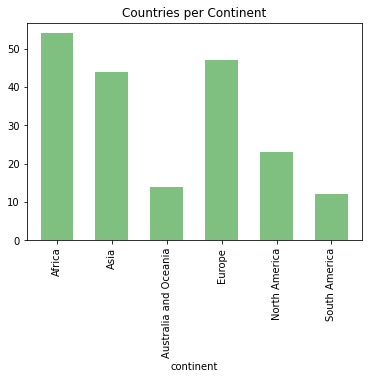

In [115]:
group_cont = continents.groupby('continent')['country'].count()
group_cont.plot.bar(color='green', alpha=0.5, width=0.6, title='Countries per Continent')

&lt;AxesSubplot:ylabel=&#39;country&#39;&gt;

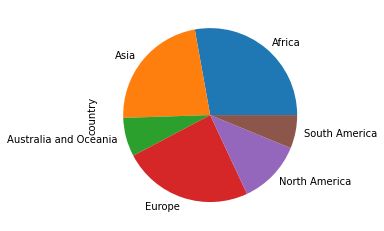

In [101]:
# same data displayed in the most unprofessional chart

group_cont.plot(kind='pie')

## Life expectancy

In [5]:
# 1. read the file into pandas
import pandas as pd

df = pd.read_excel('/home/lorena/Documents/bootcamp/W1/gapminder_lifeexpectancy.xlsx', index_col=0)
life = df[1960].dropna()
life.head()

Life expectancy
Afghanistan            31.94
Albania                62.87
Algeria                47.50
Angola                 35.98
Antigua and Barbuda    62.97
Name: 1960, dtype: float64

In [7]:
# 2. calculate the mean life expectancy

print("The mean life expectancy is", round(life.mean(),1), "years.")

The mean life expectancy is 54.7 years.


In [8]:
# 3. calculate the median

print("The median life expectancy is", life.median(), "years.")

The median life expectancy is 56.185 years.


In [9]:
# 4. calculate the standard deviation

print("The standard deviations of life expectancy is", round(life.std(),2))

The standard deviations of life expectancy is 11.69


In [10]:
# 5. calculate the variance

life.var()

136.64761737106545

In [11]:
# 6. find the highest life expectancy

print("The highest life expectancy is", life.max(), "years.")

The highest life expectancy is 74.22 years.


In [12]:
# 7. find the lowest life expectancy

print("The lowest life expectancy is", life.min(), "years.")

The lowest life expectancy is 29.61 years.


In [13]:
# 8. find the 90% quantile

print("The 90th quantile is", life.quantile(0.9))

The 90th quantile is 69.707


In [14]:
# 9. store the number of points in a variable

points = len(life)
points

202

In [15]:
# 10. get a summary with multiple descriptors

life.describe()

count    202.000000
mean      54.732822
std       11.689637
min       29.610000
25%       45.075000
50%       56.185000
75%       64.742500
max       74.220000
Name: 1960, dtype: float64

In [ ]:
## 

## Population growth

In [2]:
# read the dataset

population = pd.read_excel('/home/lorena/Documents/bootcamp/W1/gapminder_population.xlsx')
population.head()

,Total population,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
4,Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0


In [3]:
population['Total population'].unique()

array([&#39;Abkhazia&#39;, &#39;Afghanistan&#39;, &#39;Akrotiri and Dhekelia&#39;, &#39;Albania&#39;,
       &#39;Algeria&#39;, &#39;American Samoa&#39;, &#39;Andorra&#39;, &#39;Angola&#39;, &#39;Anguilla&#39;,
       &#39;Antigua and Barbuda&#39;, &#39;Argentina&#39;, &#39;Armenia&#39;, &#39;Aruba&#39;,
       &#39;Australia&#39;, &#39;Austria&#39;, &#39;Azerbaijan&#39;, &#39;Bahamas&#39;, &#39;Bahrain&#39;,
       &#39;Bangladesh&#39;, &#39;Barbados&#39;, &#39;Belarus&#39;, &#39;Belgium&#39;, &#39;Belize&#39;, &#39;Benin&#39;,
       &#39;Bermuda&#39;, &#39;Bhutan&#39;, &#39;Bolivia&#39;, &#39;Bosnia and Herzegovina&#39;,
       &#39;Botswana&#39;, &#39;Brazil&#39;, &#39;British Virgin Islands&#39;, &#39;Brunei&#39;,
       &#39;Bulgaria&#39;, &#39;Burkina Faso&#39;, &#39;Burundi&#39;, &#39;Cambodia&#39;, &#39;Cameroon&#39;,
       &#39;Canada&#39;, &#39;Cape Verde&#39;, &#39;Cayman Islands&#39;,
       &#39;Central African Republic&#39;, &#39;Chad&#39;, &#39;Channel Islands&#39;, &#

In [4]:
# average population across all years for each country
population.mean(axis=1) 

0               NaN
1      1.321200e+07
2      1.315778e+04
3      2.171706e+06
4      1.875207e+07
           ...     
270             NaN
271             NaN
272             NaN
273             NaN
274             NaN
Length: 275, dtype: float64

In [5]:
# remove rows with missing values
population_clean = population.dropna()
population_clean.head()

,Total population,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1,Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
3,Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
4,Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0
5,American Samoa,8170.0,8156.0,8142.0,8128.0,8114.0,7958.0,7564.0,7057.0,6582.0,...,58648.0,57904.0,57031.0,56226.0,55636.0,55316.0,55227.0,55302.0,55434.0,55538.0
6,Andorra,2654.0,2654.0,2700.0,2835.0,3026.0,3230.0,3436.0,3654.0,3885.0,...,83373.0,84878.0,85616.0,85474.0,84419.0,82326.0,79316.0,75902.0,72786.0,70473.0


In [6]:
# rearrange axes

population_transpose = population_clean.transpose()
population_transpose

,1,3,4,5,6,7,8,9,10,11,...,245,246,247,249,250,251,254,256,257,259
Total population,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Vanuatu,Venezuela,West Bank and Gaza,Western Sahara,Vietnam,Virgin Islands (U.S.),Yemen,Zambia,Zimbabwe,South Sudan
1800,3.28e+06,410445,2.50322e+06,8170,2654,1.56703e+06,2025,37000,534000,413326,...,27791,718000,165944,2788,6.551e+06,40000,2.593e+06,747000,1.08581e+06,1.02738e+06
1810,3.28e+06,423591,2.59506e+06,8156,2654,1.56703e+06,2025,37000,534000,413326,...,27791,718000,165944,2788,6.551e+06,40000,2.593e+06,747000,1.08581e+06,1.04108e+06
1820,3.32352e+06,438671,2.71308e+06,8142,2700,1.59753e+06,2064,37000,570719,423527,...,28098,759249,165944,2882,6.71934e+06,40000,2.60544e+06,747000,1.10663e+06,1.06373e+06
1830,3.44898e+06,457234,2.88036e+06,8128,2835,1.68639e+06,2177,37000,686703,453507,...,28979,887197,165944,3161,7.21492e+06,40000,2.64078e+06,747000,1.16726e+06,1.10325e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,2.88092e+07,2.88601e+06,3.67171e+07,55316,82326,2.19423e+07,13956,88152,4.16556e+07,2.96798e+06,...,241876,2.94276e+07,4.18114e+06,525388,8.93219e+07,106244,2.42349e+07,1.43435e+07,1.42556e+07,1.05101e+07
2012,2.97268e+07,2.88067e+06,3.74394e+07,55227,79316,2.26856e+07,14133,89069,4.20952e+07,2.97834e+06,...,247498,2.98542e+07,4.29783e+06,537779,9.03355e+07,106174,2.48828e+07,1.47866e+07,1.45655e+07,1.09806e+07
2013,3.06825e+07,2.88328e+06,3.81861e+07,55302,75902,2.34482e+07,14300,89985,4.25383e+07,2.99219e+06,...,253165,3.0276e+07,4.41834e+06,549538,9.13788e+07,106166,2.55332e+07,1.52461e+07,1.48981e+07,1.14538e+07
2014,3.16275e+07,2.88968e+06,3.89343e+07,55434,72786,2.42275e+07,14460,90900,4.298e+07,3.00615e+06,...,258883,3.06938e+07,4.54206e+06,561034,9.24233e+07,106208,2.61837e+07,1.57213e+07,1.52459e+07,1.19112e+07


In [7]:
population_transpose.columns = population_transpose.iloc[0]
population_transpose = population_transpose.iloc[1:]
population_transpose.head()

Total population,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Vanuatu,Venezuela,West Bank and Gaza,Western Sahara,Vietnam,Virgin Islands (U.S.),Yemen,Zambia,Zimbabwe,South Sudan
1800,3.28e+06,410445,2.50322e+06,8170,2654,1.56703e+06,2025,37000,534000,413326,...,27791,718000,165944,2788,6.551e+06,40000,2.593e+06,747000,1.08581e+06,1.02738e+06
1810,3.28e+06,423591,2.59506e+06,8156,2654,1.56703e+06,2025,37000,534000,413326,...,27791,718000,165944,2788,6.551e+06,40000,2.593e+06,747000,1.08581e+06,1.04108e+06
1820,3.32352e+06,438671,2.71308e+06,8142,2700,1.59753e+06,2064,37000,570719,423527,...,28098,759249,165944,2882,6.71934e+06,40000,2.60544e+06,747000,1.10663e+06,1.06373e+06
1830,3.44898e+06,457234,2.88036e+06,8128,2835,1.68639e+06,2177,37000,686703,453507,...,28979,887197,165944,3161,7.21492e+06,40000,2.64078e+06,747000,1.16726e+06,1.10325e+06
1840,3.62502e+06,478227,3.08272e+06,8114,3026,1.8131e+06,2338,37000,873747,496835,...,30208,1.08795e+06,165944,3574,7.93304e+06,40000,2.68928e+06,747000,1.25364e+06,1.1534e+06


In [ ]:
sns.lineplot(data=population_transpose, x='Total population', y=)

## Analyzing data for Romania

In [8]:
# create a subset only with data for Romania

romania = population_transpose['Romania']
romania.head()

1800    5.46408e+06
1810     5.9151e+06
1820    6.39045e+06
1830    6.89338e+06
1840    7.42993e+06
Name: Romania, dtype: object

In [9]:
type(romania)

pandas.core.series.Series

In [10]:
# convert the series into a dataframe

romania = pd.DataFrame(romania)
romania.head()

,Romania
1800,5.46408e+06
1810,5.9151e+06
1820,6.39045e+06
1830,6.89338e+06
1840,7.42993e+06


In [11]:
# now I have a dataframe, but the index is the year, and that's not really helpful.
# reset the index and make a year column

romania_df = romania.reset_index()
romania_df

,index,Romania
0,1800,5.46408e+06
1,1810,5.9151e+06
2,1820,6.39045e+06
3,1830,6.89338e+06
4,1840,7.42993e+06
...,...,...
76,2011,2.01117e+07
77,2012,1.9945e+07
78,2013,1.97942e+07
79,2014,1.96516e+07


In [12]:
# that looks better, now just rename the columns

romania_df.columns = ['year', 'population']
romania_df.head()

,year,population
0,1800,5.46408e+06
1,1810,5.9151e+06
2,1820,6.39045e+06
3,1830,6.89338e+06
4,1840,7.42993e+06
